# **Proyek Akhir Machine Learning Terapan**
## **Sistem Rekomendasi _Amazon Sales Product_ dengan Content-Bassed Filtering**
### Laily Khoirunnisa' - MLT4

##**1. Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import zipfile, os
from google.colab import files

 ## **2. Data Loading**

In [2]:
!pip install -q kaggle
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
!kaggle datasets download -d karkavelrajaj/amazon-sales-dataset

  0% 0.00/1.95M [00:00<?, ?B/s]
100% 1.95M/1.95M [00:00<00:00, 195MB/s]


In [4]:
local_zip = 'amazon-sales-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
df_amz = pd.read_csv("/tmp/amazon.csv")

## **3. Exploratory Data Analysis (EDA)**

**Mengamati Isi Dataset**

In [6]:
df_amz.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**Jumlah data dan kolom variabel data**

In [7]:
df_amz.shape

(1465, 16)

**Cek datatype variabel data**

In [8]:
df_amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**Cek data inkonsisten**

In [9]:
df_amz["rating"].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [10]:
df_amz.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [11]:
df_amz['rating_count'].value_counts()

9,378     9
18,998    8
24,269    7
43,994    6
32,840    5
         ..
17,810    1
53,648    1
2,014     1
5,958     1
6,987     1
Name: rating_count, Length: 1143, dtype: int64

**Cek data kosong**

In [12]:
df_amz.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

## **4. Data Cleaning**

In [13]:
# Mengganti inconsisten data sekaligus mengubah data type sesuai dengan isi query
df_amz['rating'] = df_amz['rating'].astype(str).str.replace('|', '4.0').str.replace(',', '').astype(float)

<ipython-input-13-364cd9ce5161>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_amz['rating'] = df_amz['rating'].astype(str).str.replace('|', '4.0').str.replace(',', '').astype(float)


In [14]:
#mengisi data rating_count yang kosong dengan mode()[0]
df_amz['rating_count'].fillna(df_amz['rating_count'].mode()[0], inplace=True)

In [15]:
#mengubah tipe data
df_amz['rating_count'] = df_amz['rating_count'].astype(str).str.replace(',', '').astype(float)

In [16]:
#mengubah kolom harga setelah diskon, harga dan presentasi diskon menjadi tipe numerik
df_amz['discounted_price'] = df_amz['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df_amz['actual_price'] = df_amz['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df_amz['discount_percentage'] = df_amz['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [17]:
df_amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [18]:
#cek duplikat record
df_amz.duplicated().sum()

0

In [19]:
# menghilangkan spasi di product_id
df_amz['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

**Melanjutkan analisa data numerik setelah data dibersihkan**

In [20]:
df_amz['actual_price'].describe()

count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64

In [21]:
df_amz['discounted_price'].describe()

count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

In [22]:
df_amz['discount_percentage'].describe()

count    1465.000000
mean        0.476915
std         0.216359
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

In [23]:
df_amz['rating'].describe()

count    1465.000000
mean        4.096519
std         0.291585
min         2.000000
25%         4.000000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64

In [24]:
df_amz['rating_count'].describe()

count      1465.000000
mean      18283.367235
std       42725.921124
min           2.000000
25%        1191.000000
50%        5179.000000
75%       17325.000000
max      426973.000000
Name: rating_count, dtype: float64

**Plot Diagram: Banyak Produk per Kategori**

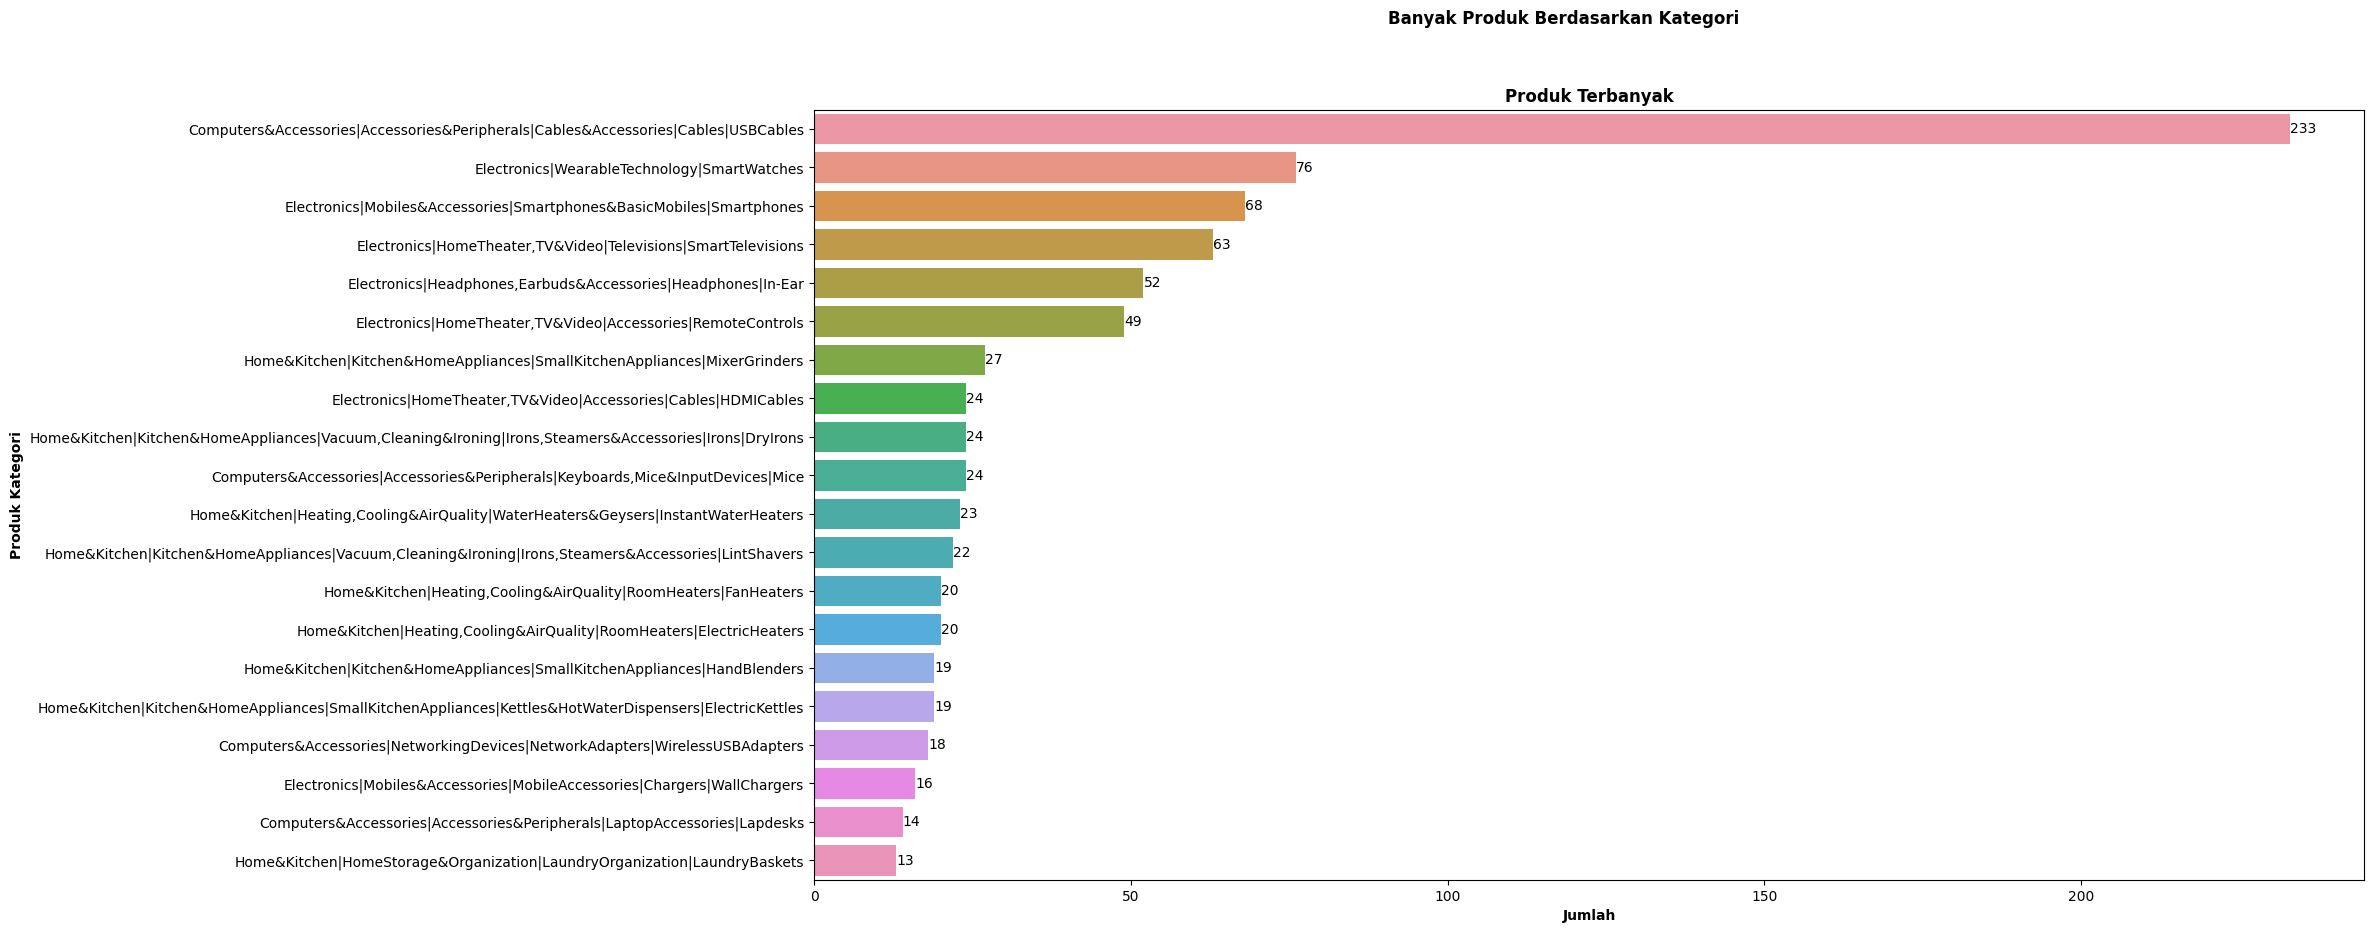

In [25]:
most_items = df_amz['category'].value_counts().head(20).rename_axis('category').reset_index(name='counts')

fig, ax = plt.subplots(1,1,figsize=(8, 10))
fig.suptitle('Banyak Produk Berdasarkan Kategori', fontweight='heavy')

sns.barplot(ax=ax, data=most_items, x='counts', y='category')

plt.subplots_adjust(hspace = 0.2)
plt.gcf().set_size_inches(20,10)

ax.set_xlabel('Jumlah', fontweight='bold')
ax.set_ylabel('Produk Kategori', fontweight='bold')

ax.set_title('Produk Terbanyak', fontweight='bold')
ax.bar_label(ax.containers[0])

plt.show()

**Word Cloud pada variabel `Review` dan `Product Name`**

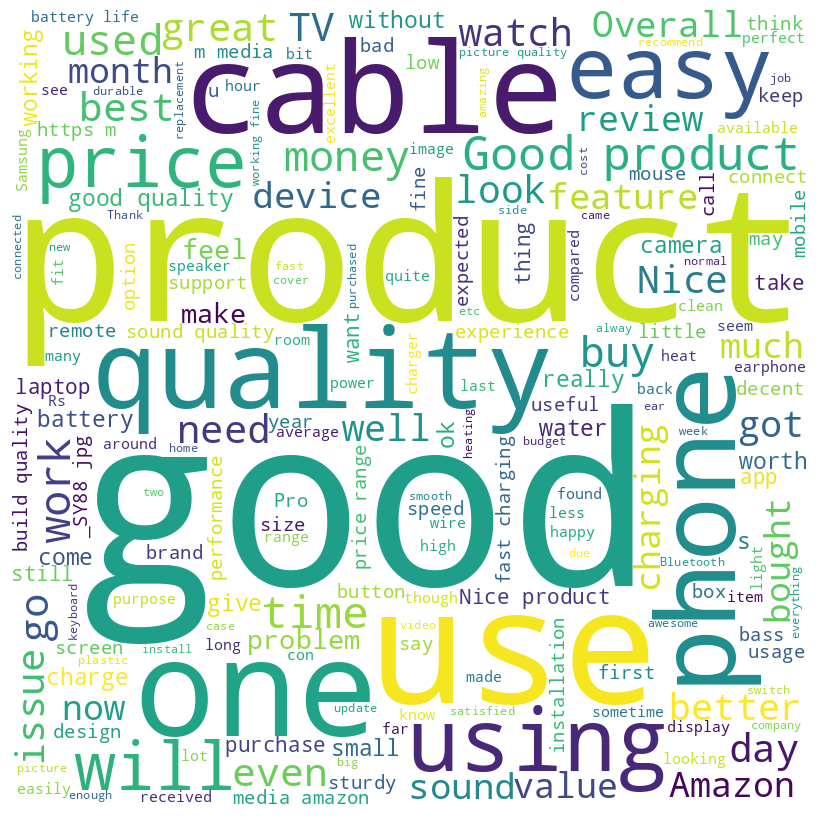

In [26]:
from wordcloud import WordCloud

# Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.
reviews_text = ' '.join(df_amz['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

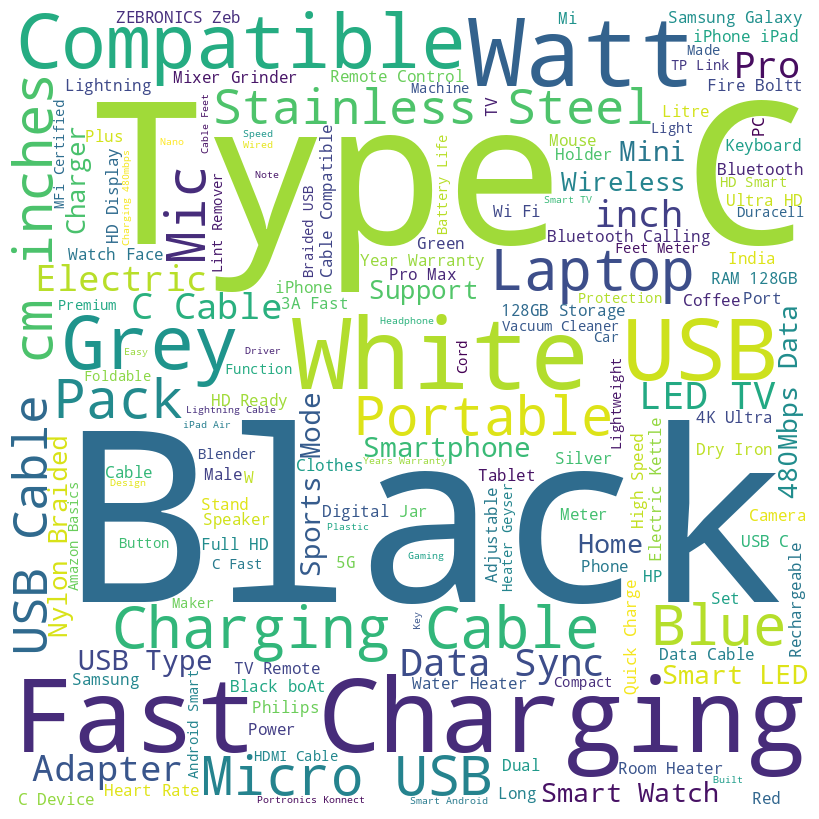

In [27]:
# Analyze the reviews by creating word clouds or frequency tables of the most common words used in the product name.
reviews_text = ' '.join(df_amz['product_name'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

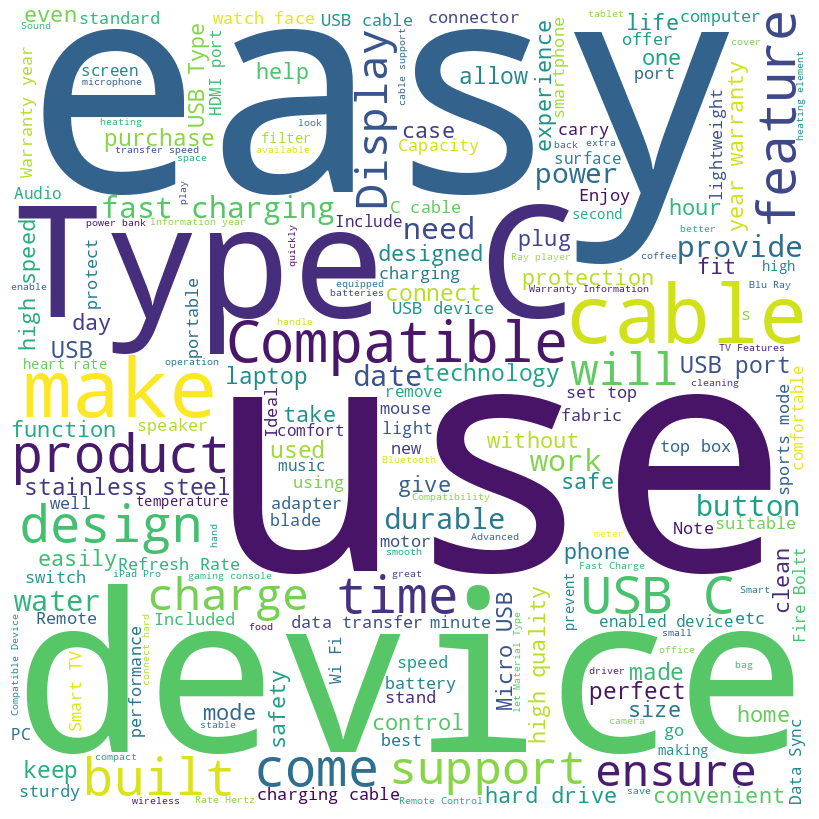

In [28]:
reviews_text = ' '.join(df_amz['about_product'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

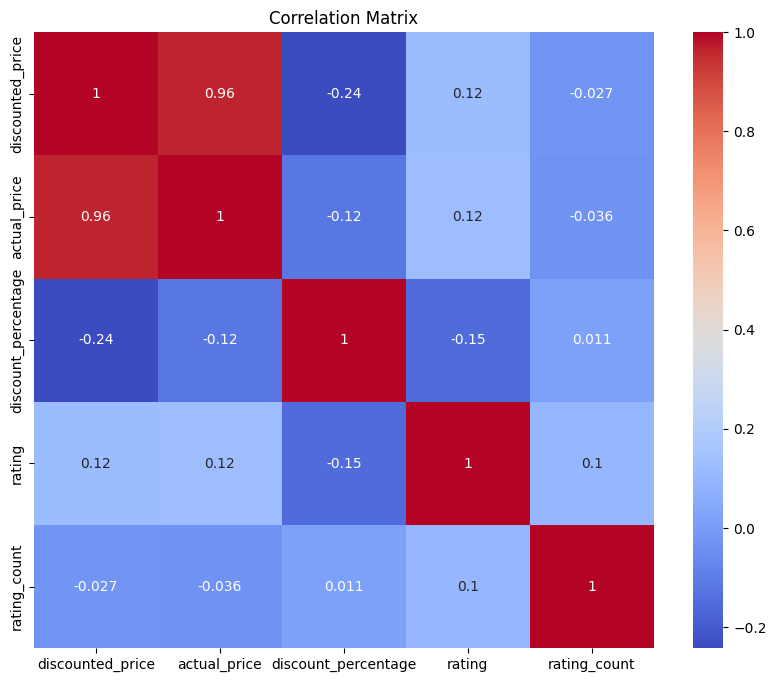

In [29]:
numeric_cols = df_amz.select_dtypes(include=['float64'])
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Inisialisasi Tokenizer**

In [30]:
from nltk.tokenize import RegexpTokenizer
import re

# Initialize tokenizer
tokenizer = RegexpTokenizer(r'\w+')

**Membuat Fungsi preprocess_text**

In [31]:
# text-preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = tokenizer.tokenize(text)  # Tokenize text
    return ' '.join(tokens)

**Memecah kata kunci pada kolom `category`**

In [32]:
text_cleaning_category = df_amz['category'].str.replace( r"([A-Z])", r" \1").str.strip()
text_cleaning_category = df_amz['category'].str.replace('&', '')
text_cleaning_category = df_amz['category'].str.replace('|', '')
text_cleaning_category = df_amz['category'].str.replace(',', '')
text_cleaning_category

<ipython-input-32-085e114a1ac6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text_cleaning_category = df_amz['category'].str.replace( r"([A-Z])", r" \1").str.strip()
<ipython-input-32-085e114a1ac6>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  text_cleaning_category = df_amz['category'].str.replace('|', '')


0       Computers&Accessories|Accessories&Peripherals|...
1       Computers&Accessories|Accessories&Peripherals|...
2       Computers&Accessories|Accessories&Peripherals|...
3       Computers&Accessories|Accessories&Peripherals|...
4       Computers&Accessories|Accessories&Peripherals|...
                              ...                        
1460    Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462    Home&Kitchen|HeatingCooling&AirQuality|RoomHea...
1463    Home&Kitchen|HeatingCooling&AirQuality|Fans|Ex...
1464    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, Length: 1465, dtype: object

**Cek data kosong pada `about_product`**

In [33]:
df_amz['about_product'].isnull().sum()

0

**Mengaplikasikan preprocessing pada dataframe**

In [34]:
# Apply text preprocessing to 'product_name', 'categories', 'review_content', and 'about_product' columns
text_cleaning_about_product = df_amz['about_product'].apply(preprocess_text)
text_cleaning_product_name = df_amz['product_name'].apply(preprocess_text)
text_cleaning_review_content = df_amz['review_content'].apply(preprocess_text)
text_cleaning_category = df_amz['category'].apply(preprocess_text)

**Menggabungkan data hasil preprocessing**

In [35]:
df_amz['text'] = text_cleaning_about_product + ' ' + text_cleaning_product_name + ' ' + text_cleaning_review_content + ' ' + text_cleaning_category

In [36]:
df_amz['text'][0]

'high compatibility compatible with iphone x xsmax xr iphone plus iphone plus iphone s s plus iphone plus iphone s c se ipad pro ipad air ipad mini ipod nano ipod touch and more apple devices fast charge data sync it can charge and sync simultaneously at a rapid speed compatible with any charging adaptor multi port charging station or power bank durability durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility high security level it is designed to fully protect your device from damaging excessive current copper core thick multilayer shielding anti interference protective circuit equipment warranty months warranty and friendly customer services ensures the long time enjoyment of your purchase if you meet any question or problem please don t hesitate to contact us wayona nylon braided usb to lightning fast charging and data sync cable compatible for iphone x ipad

**Mengubah data text menjadi fitur numerik dengan TF-IDF**

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfV = TfidfVectorizer(stop_words='english')

In [38]:
# Apply TF-IDF vectorization to 'text' column
tfidf_matrix = tfV.fit_transform(df_amz['text'])

#**Modelling Item Centred dengan Metode Content Based Filtering**
Mencari Rekomendasi berdasarkan kesamaan produk item

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [40]:
def get_product_recommendations(product_id, num_recommendations=5):
    # Get the index of the product with the given ID
    index = df_amz[df_amz['product_id'] == product_id].index[0]

    # Get the pairwise similarity scores of the product
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar products
    top_products = [df_amz.iloc[score[0]] for score in sim_scores[1:num_recommendations+2]]

    score = [sim_scores[i][1] for i in range(6)]
    top_df_temp = pd.DataFrame(top_products)
    top_df = pd.DataFrame()
    top_df['product_id']=top_df_temp['product_id']
    top_df['product_name']=top_df_temp['product_name']
    top_df['category']=top_df_temp['category']
    top_df['score']=score

    #remove 1st row
    top_df = top_df.tail(-1)

    return top_df

In [41]:
product_id = 'B07CRL2GY6'  # wayona USB to lightning
recommendations = get_product_recommendations(product_id)
recommendations
#print(recommendations)

,product_id,product_name,category,score
443,B0789LZTCJ,boAt Rugged v3 Extra Tough Unbreakable Braided...,Computers&Accessories|Accessories&Peripherals|...,0.974749
92,B08HDH26JX,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,0.974749
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,0.497482
392,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,0.489176
628,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,0.489176


In [42]:
product_id = 'B09YL9SN9B'  # TV LG 80 cm 32"
recommendations = get_product_recommendations(product_id)
recommendations

,product_id,product_name,category,score
714,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.626515
168,B0B9959XF3,Acer 80 cm (32 inches) S Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.626515
135,B0B3XY5YT4,LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.568036
283,B0B3XXSB1K,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.564709
270,B0B997FBZT,Acer 139 cm (55 inches) H Series 4K Ultra HD A...,"Electronics|HomeTheater,TV&Video|Televisions|S...",0.564709


In [44]:
product_id = 'B00J5DYCCA'  # Havells exhaust fan for kitchen
recommendations = get_product_recommendations(product_id)
recommendations

,product_id,product_name,category,score
1431,B00KIDSU8S,Havells Ventil Air DX 200mm Exhaust Fan (White),"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",0.469035
1202,B09MT94QLL,Havells Glaze 74W Pearl Ivory Gold Ceiling Fan...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|C...",0.435179
1175,B01LYU3BZF,Havells Ambrose 1200mm Ceiling Fan (Gold Mist ...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|C...",0.291960
1287,B095PWLLY6,Crompton Hill Briz Deco 1200mm (48 inch) High ...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|C...",0.285529
1095,B01M0505SJ,Orient Electric Apex-FX 1200mm Ultra High Spee...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|C...",0.258879


#**Modelling User Centred dengan Metode Content Based Filtering**
####Rekomendasi item berdasarkan riwayat pembelian User

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_amz['user_id_encoded'] = le.fit_transform(df_amz['user_id'])

from sklearn.preprocessing import LabelEncoder

# membuat dataframe user_id frequency table
freq_table = pd.DataFrame({'User ID': df_amz['user_id_encoded'].value_counts().index, 'Frequency': df_amz['user_id_encoded'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)

      User ID  Frequency
0        1048         10
1         623          8
2         674          8
3         254          7
4          88          7
...       ...        ...
1189      429          1
1190      506          1
1191       11          1
1192      900          1
1193      433          1

[1194 rows x 2 columns]
1048


In [46]:
def recommend_products_as_user(df, user_id_encoded):
    # Get the purchase history for the user
    user_history = df[df['user_id_encoded'] == user_id_encoded]

    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:7]]

        # Get the names of the top 5 most similar products
        recommended_products = df.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(6)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 6,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        #remove 1st similar=1
        results_df = results_df.tail(-1)

        return results_df

    else:
        print("No purchase history found.")
        return None


In [47]:
recommend_products_as_user(df_amz, 5)

,Id Encoded,recommended product,score recommendation
1,5,SanDisk Extreme microSD UHS I Card 128GB for 4...,0.972423
2,5,"SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...",0.348298
3,5,"SanDisk Ultra® microSDXC™ UHS-I Card, 128GB, 1...",0.333741
4,5,"SanDisk Ultra® microSDXC™ UHS-I Card, 256GB, 1...",0.333741
5,5,"SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...",0.333741


In [48]:
recommend_products_as_user(df_amz, 11)

,Id Encoded,recommended product,score recommendation
1,11,Zebronics Zeb-Companion 107 USB Wireless Keybo...,0.566889
2,11,Portronics Key2 Combo Multimedia USB Wireless ...,0.565332
3,11,HP 330 Wireless Black Keyboard and Mouse Set w...,0.548851
4,11,Zebronics ZEB-KM2100 Multimedia USB Keyboard C...,0.541751
5,11,Dell USB Wireless Keyboard and Mouse Set- KM33...,0.522301


In [49]:
recommend_products_as_user(df_amz, 337)

,Id Encoded,recommended product,score recommendation
1,337,Bulfyss Plastic Sticky Lint Roller Hair Remove...,0.681677
2,337,Wolpin 1 Lint Roller with 60 Sheets Remove Clo...,0.643233
3,337,"SHOPTOSHOP Electric Lint Remover, Best Lint Sh...",0.602602
4,337,House of Quirk Reusable Sticky Picker Cleaner ...,0.556171
5,337,Portable Lint Remover Pet Fur Remover Clothes ...,0.543243


In [50]:
df_amz.loc[df_amz['user_id_encoded'] == 11]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,text,user_id_encoded
715,B07KR5P3YD,Zebronics Wired Keyboard and Mouse Combo with ...,Computers&Accessories|Accessories&Peripherals|...,448.0,699.0,0.36,3.9,17348.0,"Keyboard : Standard keyboard|Rupee key, Comfor...","AE35OI7LDTOKU32IFQ3GQX5AOKFQ,AHT5CRFFKABTHYW4E...","lucky,SALMAN S,Rahul Singh,INSOLARE ENERGY PVT...","R1JXCQXDJH1CEV,R3C6DZWAYPPVIX,R2RMNGCEK9JTR6,R...","light weight okay in this price range,Value fo...",design of the keyboard and mouse lenght of the...,https://m.media-amazon.com/images/I/3164hjUSFd...,https://www.amazon.in/Zebronics-Zeb-JUDWAA-750...,keyboard standard keyboard rupee key comfortab...,11
